In [1]:
import glob, os, sys, re, random
from collections import defaultdict, Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ete3
from ete3 import PhyloTree
from Bio import SeqIO
import tqdm

In [2]:
def collect_seqs(pattern: str, label: str, genes: list, sp=False):
    directory = "../data/MIDORI2/fasta/"
    file = "MIDORI2_{}_NUC_SP_GB253_{}_BLAST.fasta" if sp else "MIDORI2_{}_NUC_GB253_{}_BLAST.fasta"
    path_to_fasta = directory + file
    seqs = defaultdict(list)
    for gene in tqdm.tqdm(genes):
        inp = path_to_fasta.format(label, gene)
        for rec in SeqIO.parse(inp, "fasta"):
            header = rec.description
            
            if pattern not in header:
                continue

            raw_acc, taxa = header.split("###")
            acc, place = re.match("(\w+\.\d)\.(.+)", raw_acc).groups()
            taxa = taxa.removeprefix("root_1;Eukaryota_2759;")
            species = " ".join(taxa.split(";")[-1].split("_")[:-1])
            rec.id = acc
            rec.description = f"{species} {place} ###{taxa}"
            seqs[gene + "__" + species.replace(" ", "_")].append(rec)
    return seqs


def filter_seqs(recs: list, var_gene_len=0.2, Nshare=0.2):
    assert isinstance(recs, list)
    seq_len_mean = np.median([len(x) for x in recs])
    min_seq_len = seq_len_mean * (1 - var_gene_len)
    max_seq_len = seq_len_mean * (1 + var_gene_len)

    recs_filtered = []
    for rec in recs:
        acgt_share = sum(rec.seq.count(x) for x in "ACGT") / len(rec)
        if min_seq_len < len(rec) < max_seq_len and 1 - acgt_share < Nshare:
            recs_filtered.append(rec)

    return recs_filtered


def filter_seqs_dict(seqs, nseqs_min=10, var_gene_len=0.2, Nshare=0.2):
    assert isinstance(seqs, dict)
    seqs_filtered = dict()
    for gene_species, recs in seqs.items():
        if len(recs) < nseqs_min:
            continue

        recs_filtered = filter_seqs(recs, var_gene_len, Nshare)
        if len(recs_filtered) >= nseqs_min:
            seqs_filtered[gene_species] = recs_filtered
    
    return seqs_filtered

## *Hominidae*

### CYTB

In [3]:
pattern = "Hominidae_"
seqs = collect_seqs(pattern, "UNIQ", ['Cytb'])
seqs_filtered = filter_seqs_dict(seqs, 1, 0.05)
print(list(seqs_filtered.keys()))

MAX_SP_NSEQS = 100
cytb_recs = []
for gene_sp, recs in seqs_filtered.items():
    if len(recs) > MAX_SP_NSEQS:
        print(gene_sp)
        recs = random.sample(recs, MAX_SP_NSEQS)
    cytb_recs.extend(recs)

cytb_recs_filtered = filter_seqs(cytb_recs, 0.1)

# SeqIO.write(cytb_recs_filtered, "../data/MUS/genes/CYTB.fna", "fasta-2line")

100%|██████████| 1/1 [00:04<00:00,  4.45s/it]

['Cytb__Gorilla_beringei', 'Cytb__Gorilla_gorilla', 'Cytb__Homo_heidelbergensis', 'Cytb__Homo_sapiens', 'Cytb__Pan_paniscus', 'Cytb__Pan_troglodytes', 'Cytb__Pongo_abelii', 'Cytb__Pongo_pygmaeus']
Cytb__Homo_sapiens


In [9]:
str(recs[0].seq)

'ATGACCCCCATACGCAAAACTAACCCACTGACAAAACTAATCAACCACTCATTCATTGACCTCCCTACCCCATCCAACATCTCCACATGATGAAACTTCGGCTCACTCCTTGGTGCCTGCTTAATCCTTCAAATCACCACAGGACTATTCCTAGCCATACACTACTCACCTGACGCCTCAACCGCATTCTCATCAATCGCTCACATCACCCGAGATGTGAACTATGGCTGAACCATCCGCTACCTCCACGCTAATGGCGCCTCAATGTTCTTCATTTGCCTCTTTCTGCACATCGGCCGAGGCCTATACTACGGCTCATTTCTCTACCAAGAAACCTGAAACATCGGCATCATCCTCTTACTCACAACCATAGCAGCAGCCTTCATAGGCTATGTCCTCCCATGAGGCCAAATATCCTTCTGAGGGGCCACAGTAATCACAAACTTGCTATCCGCCATCCCATACATCGGAACAAACCTAGTCCAATGGGTCTGAGGTGGTTACTCAGTAGATAGCCCCACCCTTACACGATTCTTTACCTTCCACTTTATTTTACCCTTCATTATCACAGCCCTAACAACCCTCCATCTCCTATTTCTACACGAAACAGGATCAAACAACCCTCTAGGCATCCCCTCCCACTCCGACAAAATTACTTTCCACCCCTACTACACAATCAAAGACATCCTAGGCCTATTCCTCTTTCTCCTGACCCTAATAACACTAACACTATTCTCACCAGACCTCCTAGGAGACCCAGACAACTACACCTTAGCCAACCCCCTAAACACCCCACCCCACATCAAACCCGAATGATACTTCCTATTTGCCTACGCAATCCTCCGATCTGTCCCCAATAAATTAGGAGGCGTCTTAGCCCTACTACTATCTATTCTCATCCTAGCAATAATTCCTGCTCTCCACATATCCAAACAACAAAGCATAACATTCCGCCCATTAAGCCAACTACTCTACTGATTCCTAATCACAGACCTCCTC

In [8]:
for gene_sp, recs in seqs_filtered.items():
    print(gene_sp, len(recs))
    brea

Cytb__Gorilla_beringei 8


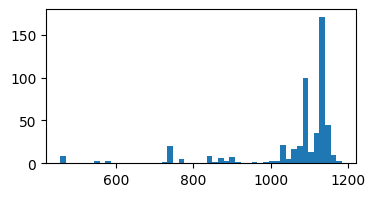

In [ ]:
plt.figure(figsize=(4, 2))
plt.hist([len(x) for x in cytb_recs], bins=50);

### ND1

In [ ]:
pattern = "Hominidae"
seqs = collect_seqs(pattern, "UNIQ", ['ND1'])
seqs_filtered = filter_seqs_dict(seqs, 1, 0.1)
print(list(seqs_filtered.keys()))

MAX_SP_NSEQS = 100
cytb_recs = []
for gene_sp, recs in seqs_filtered.items():
    if len(recs) > MAX_SP_NSEQS:
        print(gene_sp)
        recs = random.sample(recs, MAX_SP_NSEQS)
    cytb_recs.extend(recs)

cytb_recs_filtered = filter_seqs(cytb_recs, 0.1)

# SeqIO.write(cytb_recs_filtered, "../data/MUS/genes/ND1.fna", "fasta-2line")

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

['ND1__Mus_pahari', 'ND1__Mus_caroli', 'ND1__Mus_cervicolor', 'ND1__Mus_cookii', 'ND1__Mus_famulus', 'ND1__Mus_fragilicauda', 'ND1__Mus_musculus', 'ND1__Mus_spretus', 'ND1__Mus_terricolor', 'ND1__Mus_baoulei', 'ND1__Mus_saxicola']


106

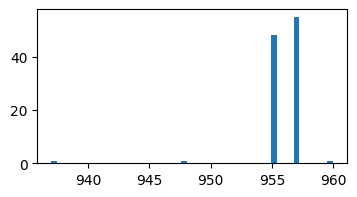

In [ ]:
plt.figure(figsize=(4, 2))
plt.hist([len(x) for x in cytb_recs], bins=50);

## *Mus* genus

### CYTB

In [80]:
pattern = "Mus_10088"
seqs = collect_seqs(pattern, "UNIQ", ['Cytb'])
seqs_filtered = filter_seqs_dict(seqs, 1, 0.05)
print(list(seqs_filtered.keys()))

MAX_SP_NSEQS = 100
cytb_recs = []
for gene_sp, recs in seqs_filtered.items():
    if len(recs) > MAX_SP_NSEQS:
        print(gene_sp)
        recs = random.sample(recs, MAX_SP_NSEQS)
    cytb_recs.extend(recs)

cytb_recs_filtered = filter_seqs(cytb_recs, 0.1)

SeqIO.write(cytb_recs_filtered, "../data/MUS/genes/CYTB.fna", "fasta-2line")

100%|██████████| 1/1 [00:04<00:00,  4.33s/it]

['Cytb__Mus_crociduroides', 'Cytb__Mus_mayori', 'Cytb__Mus_pahari', 'Cytb__Mus_booduga', 'Cytb__Mus_caroli', 'Cytb__Mus_cervicolor', 'Cytb__Mus_cookii', 'Cytb__Mus_cypriacus', 'Cytb__Mus_famulus', 'Cytb__Mus_fragilicauda', 'Cytb__Mus_lepidoides', 'Cytb__Mus_macedonicus', 'Cytb__Mus_musculus', 'Cytb__Mus_nitidulus', 'Cytb__Mus_poschiavinus', 'Cytb__Mus_spicilegus', 'Cytb__Mus_spretus', 'Cytb__Mus_terricolor', 'Cytb__Mus_triton', 'Cytb__Mus_baoulei', 'Cytb__Mus_callewaerti', 'Cytb__Mus_harennensis', 'Cytb__Mus_haussa', 'Cytb__Mus_indutus', 'Cytb__Mus_mahomet', 'Cytb__Mus_mattheyi', 'Cytb__Mus_minutoides', 'Cytb__Mus_musculoides', 'Cytb__Mus_neavei', 'Cytb__Mus_setulosus', 'Cytb__Mus_sorella', 'Cytb__Mus_tenellus', 'Cytb__Mus_fernandoni', 'Cytb__Mus_platythrix', 'Cytb__Mus_saxicola']
Cytb__Mus_musculus
Cytb__Mus_spretus


445

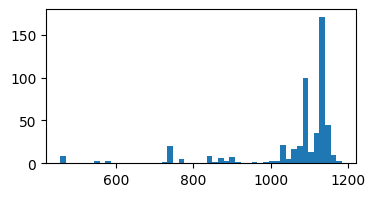

In [78]:
plt.figure(figsize=(4, 2))
plt.hist([len(x) for x in cytb_recs], bins=50);

### ND1

In [75]:
pattern = "Mus_10088"
seqs = collect_seqs(pattern, "UNIQ", ['ND1'])
seqs_filtered = filter_seqs_dict(seqs, 1, 0.1)
print(list(seqs_filtered.keys()))

MAX_SP_NSEQS = 100
cytb_recs = []
for gene_sp, recs in seqs_filtered.items():
    if len(recs) > MAX_SP_NSEQS:
        print(gene_sp)
        recs = random.sample(recs, MAX_SP_NSEQS)
    cytb_recs.extend(recs)

cytb_recs_filtered = filter_seqs(cytb_recs, 0.1)

SeqIO.write(cytb_recs_filtered, "../data/MUS/genes/ND1.fna", "fasta-2line")

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

['ND1__Mus_pahari', 'ND1__Mus_caroli', 'ND1__Mus_cervicolor', 'ND1__Mus_cookii', 'ND1__Mus_famulus', 'ND1__Mus_fragilicauda', 'ND1__Mus_musculus', 'ND1__Mus_spretus', 'ND1__Mus_terricolor', 'ND1__Mus_baoulei', 'ND1__Mus_saxicola']


106

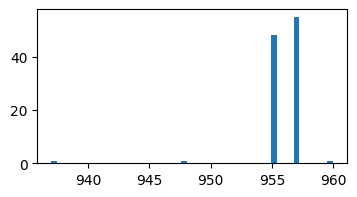

In [76]:
plt.figure(figsize=(4, 2))
plt.hist([len(x) for x in cytb_recs], bins=50);

## *Mus musculus* & *Mus spretus*

In [44]:
genes = ['Cytb', 'ND1']
pattern1 = "Mus_musculus"
seqs1 = collect_seqs(pattern1, "UNIQ", genes)
seqs1_filtered = filter_seqs(seqs1, 1)

pattern2 = "Mus_spretus"
seqs2 = collect_seqs(pattern2, "UNIQ", genes)
seqs2_filtered = filter_seqs(seqs2, 1)

100%|██████████| 2/2 [00:05<00:00,  2.53s/it]


In [55]:
seqs2_filtered["ND1__Mus_spretus"]

[SeqRecord(seq=Seq('GTGTTCTTTATCAACATTTTAACACTCCTCCTACCTATCCTAATCGCTATGGCT...TAT'), id='MW209725.1', name='MW209725.1.2746.3700###root_1;Eukaryota_2759;Chordata_7711;Mammalia_40674;Rodentia_9989;Muridae_10066;Mus_10088;Mus_spretus_10096', description='Mus spretus 2746.3700 ###Chordata_7711;Mammalia_40674;Rodentia_9989;Muridae_10066;Mus_10088;Mus_spretus_10096', dbxrefs=[]),
 SeqRecord(seq=Seq('GTGTTCTTTATCAACATTTTAACACTCCTCCTACCTATCCTAATCGCTATGGCT...TAT'), id='KY018921.1', name='KY018921.1.2749.3703###root_1;Eukaryota_2759;Chordata_7711;Mammalia_40674;Rodentia_9989;Muridae_10066;Mus_10088;Mus_spretus_10096', description='Mus spretus 2749.3703 ###Chordata_7711;Mammalia_40674;Rodentia_9989;Muridae_10066;Mus_10088;Mus_spretus_10096', dbxrefs=[])]

In [53]:
seqs2_filtered.keys()

dict_keys(['Cytb__Mus_spretus', 'ND1__Mus_spretus'])

In [56]:
nd1 = []
g = "ND1"
for p, s in zip([pattern1, pattern2], [seqs1_filtered, seqs2_filtered]):
    for r in s[g+ "__" + p]:
        nd1.append(r)

cytb = []
g = "Cytb"
for p, s in zip([pattern1, pattern2], [seqs1_filtered, seqs2_filtered]):
    for r in s[g+ "__" + p]:
        cytb.append(r)

In [60]:
print(f"nseqs = {len(cytb)}")
print(f"nseqs = {len(nd1)}")

nseqs = 769
nseqs = 93


In [61]:
SeqIO.write(nd1, "../data/exposure/mus_nd1/seqs.fasta", "fasta-2line")
SeqIO.write(cytb, "../data/exposure/mus_cytb/seqs.fasta", "fasta-2line")

769

## *Arthropoda*

In [ ]:
genes = ['A6', 'A8', 'CO1', 'CO2', 'CO3', 'Cytb', 'ND1', 'ND2', 'ND3', 'ND4', 'ND4L', 'ND5', 'ND6']
phylum = "Arthropoda"
seqs_arth = collect_seqs(phylum, "UNIQ", genes)
len(seqs_arth)

In [26]:
seqs_arth_filtered = filter_seqs(seqs_arth)
print(f"nseqs = {len(seqs_arth_filtered)}, nspecies: {len(set([x.split('__')[1] for x in seqs_arth_filtered.keys()]))}", end="\n\n")
print(pd.Series(Counter([x.split("__")[0] for x in seqs_arth_filtered.keys()])))

nseqs = 19172, nspecies: 17676

A6         65
A8         24
CO1     17116
CO2       723
CO3        73
Cytb      549
ND1       151
ND2        83
ND3        28
ND4        82
ND4L       22
ND5       211
ND6        45
dtype: int64


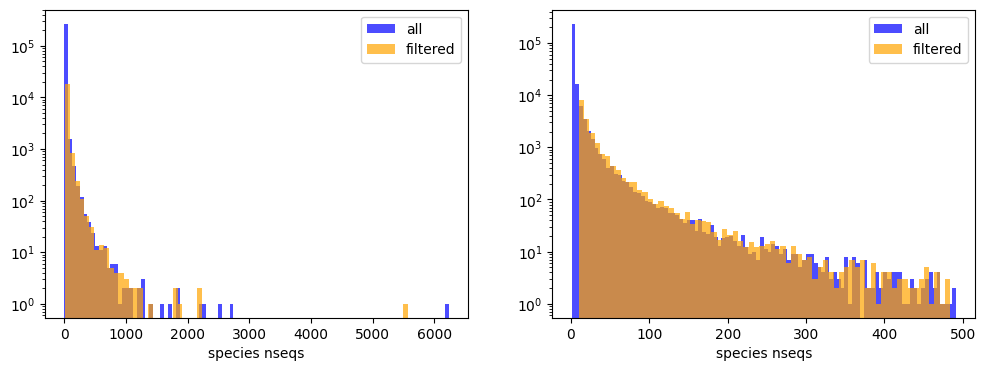

In [29]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist([len(v) for v in seqs_arth.values()], bins=100, alpha=0.7, label="all", color="blue")
plt.hist([len(v) for v in seqs_arth_filtered.values()], bins=70, alpha=0.7, label="filtered", color="orange")
plt.yscale("log")
plt.xlabel("species nseqs")
plt.legend()

plt.subplot(122)
plt.hist([len(v) for v in seqs_arth.values() if len(v) < 500], bins=100, alpha=0.7, label="all", color="blue")
plt.hist([len(v) for v in seqs_arth_filtered.values() if len(v) < 500], bins=70, alpha=0.7, label="filtered", color="orange")
plt.yscale("log")
plt.xlabel("species nseqs")
plt.legend()

plt.show()

### Prepare dataset for CO1 alignment (outgrp selection)

In [20]:
arth_aln = collect_seqs(phylum, "LONGEST", ["CO1"])

100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


In [32]:
print(len(set([x.split("__")[1] for x in seqs_arth_filtered.keys()]).difference([x.split("__")[1] for x in arth_aln.keys()])), "species without CO1 seq")

136 species without CO1 seq


## Chordata

In [81]:
genes = ['A6', 'A8', 'CO1', 'CO2', 'CO3', 'Cytb', 'ND1', 'ND2', 'ND3', 'ND4', 'ND4L', 'ND5', 'ND6']
phylum = "Chordata"
seqs = collect_seqs(phylum, "UNIQ", genes)
len(seqs)

100%|██████████| 13/13 [00:39<00:00,  3.05s/it]


192350

In [82]:
seqs_filtered = filter_seqs(seqs)
print(f"nseqs = {len(seqs_filtered)}, nspecies: {len(set([x.split('__')[1] for x in seqs_filtered.keys()]))}", end="\n\n")
print(pd.Series(Counter([x.split("__")[0] for x in seqs_filtered.keys()])))

nseqs = 15546, nspecies: 10171

A6       504
A8       188
CO1     5449
CO2      202
CO3      209
Cytb    4977
ND1      391
ND2     1906
ND3      254
ND4      836
ND4L     121
ND5      310
ND6      199
dtype: int64


In [72]:
co1_sp = [x.split("__")[1] for x in seqs_filtered.keys() if x.startswith("CO1")]
nd1_sp = [x.split("__")[1] for x in seqs_filtered.keys() if x.startswith("ND1")]
len(set(co1_sp).intersection(nd1_sp))

262

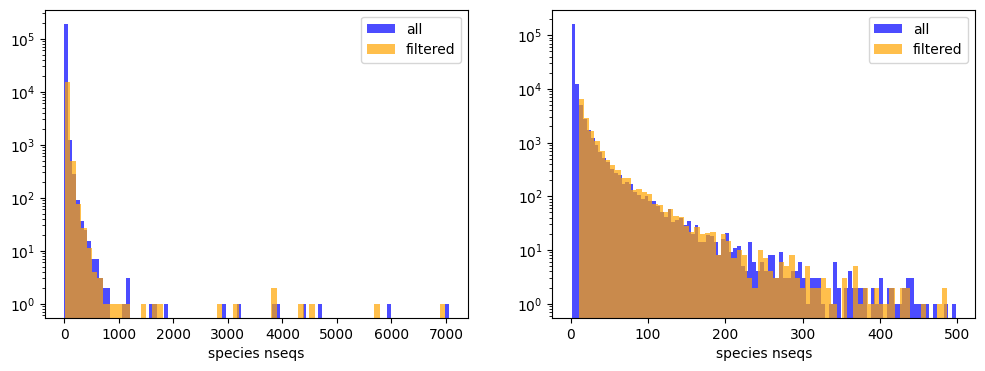

In [66]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist([len(v) for v in seqs.values()], bins=100, alpha=0.7, label="all", color="blue")
plt.hist([len(v) for v in seqs_filtered.values()], bins=70, alpha=0.7, label="filtered", color="orange")
plt.yscale("log")
plt.xlabel("species nseqs")
plt.legend()

plt.subplot(122)
plt.hist([len(v) for v in seqs.values() if len(v) < 500], bins=100, alpha=0.7, label="all", color="blue")
plt.hist([len(v) for v in seqs_filtered.values() if len(v) < 500], bins=70, alpha=0.7, label="filtered", color="orange")
plt.yscale("log")
plt.xlabel("species nseqs")
plt.legend()

plt.show()

### Check genus-wise species distribution

In [122]:
genes = ['A6', 'A8', 'CO1', 'CO2', 'CO3', 'Cytb', 'ND1', 'ND2', 'ND3', 'ND4', 'ND4L', 'ND5', 'ND6']
phylum = "Chordata"
seqs_longest = collect_seqs(phylum, "LONGEST", genes, sp=True)

100%|██████████| 13/13 [00:16<00:00,  1.29s/it]


In [123]:
seqs_longest["A6__Branchiostoma_belcheri"][0].description

'Branchiostoma belcheri 8821.9504 ###Chordata_7711;Leptocardii_2682552;Amphioxiformes_2682553;Branchiostomatidae_7736;Branchiostoma_7737;Branchiostoma_belcheri_7741'

In [126]:
data_taxa = []
for gene_sp, seqs in seqs_longest.items():
    raw_taxonomy = seqs[0].description.split("###")[1]
    phyl, clss, order, fam, genus, sp = ["_".join(x.split("_")[:-1]) for x in raw_taxonomy.split(";")]
    data_taxa.append(dict(gene=gene_sp.split('__')[0], clss=clss, order=order, fam=fam, genus=genus, sp=sp))
taxa = pd.DataFrame(data_taxa)

In [127]:
taxa

,gene,clss,order,fam,genus,sp
0,A6,Leptocardii,Amphioxiformes,Branchiostomatidae,Asymmetron,Asymmetron_sp__A_TK_2007
1,A6,Leptocardii,Amphioxiformes,Branchiostomatidae,Asymmetron,Asymmetron_inferum
2,A6,Leptocardii,Amphioxiformes,Branchiostomatidae,Asymmetron,Asymmetron_lucayanum
3,A6,Leptocardii,Amphioxiformes,Branchiostomatidae,Branchiostoma,Branchiostoma_belcheri
4,A6,Leptocardii,Amphioxiformes,Branchiostomatidae,Branchiostoma,Branchiostoma_floridae
...,...,...,...,...,...,...
222495,ND6,Ascidiacea,Stolidobranchia,Styelidae,Polycarpa,Polycarpa_mytiligera
222496,ND6,Ascidiacea,Stolidobranchia,Styelidae,Styela,Styela_clava
222497,ND6,Ascidiacea,Stolidobranchia,Styelidae,Styela,Styela_plicata
222498,ND6,Thaliacea,Salpida,Salpidae,Salpa,Salpa_fusiformis


In [132]:
a = taxa.groupby("gene").genus.value_counts()
a[a==1]

gene  genus                                                      
A6    Abalistes                                                      1
      Abantennarius                                                  1
      Ablennes                                                       1
      Aborichthys                                                    1
      Abramis                                                        1
                                                                    ..
ND6   genus_Tachysurus_fulvidraco_x_Leiocassis_longirostris          1
      genus_diploid_Megalobrama_amblycephala_x_Xenocypris_davidi     1
      genus_diploid_Xenocypris_davidi_x_Megalobrama_amblycephala     1
      genus_natural_gynogenetic_Carassius_auratus_red_var.           1
      genus_triploid_Megalobrama_amblycephala_x_Xenocypris_davidi    1
Name: genus, Length: 38440, dtype: int64

In [134]:
a = taxa.groupby("gene").fam.value_counts()
a[a==1]

gene  fam                                                               
A6    Aenigmachannidae                                                      1
      Ailiidae                                                              1
      Amarsipidae                                                           1
      Amiidae                                                               1
      Amphiumidae                                                           1
                                                                           ..
ND6   family_genus_Squaliobarbus_curriculus_x_Ctenopharyngodon_idella       1
      family_genus_diploid_Megalobrama_amblycephala_x_Xenocypris_davidi     1
      family_genus_diploid_Xenocypris_davidi_x_Megalobrama_amblycephala     1
      family_genus_natural_gynogenetic_Carassius_auratus_red_var.           1
      family_genus_triploid_Megalobrama_amblycephala_x_Xenocypris_davidi    1
Name: fam, Length: 4116, dtype: int64